In [1]:
import pathlib 

import pandas as pd
import matplotlib.pyplot as plt

# NAP history

This notebook analyses the history of the Dutch Ordnance Datum (NAP). This is an analysis of the unpublished history of the measurements of the NAP. 
The datasets are derived from different levellings and therefor not unambiguously interpretable. The quality of the measurements can vary and no information about the quality is present. 

The NAP was revised in 2005. The reference level was revised with several centimeters, varying over the Netherlands. The project-ID shows if a measurement was taken before or after the revision. Measurements after 2005 are from the revised level. Some projects have both a revised and unrevised data. Projects with an ‘=’ mark are relative to the revised level. For example: 
Project-ID  370W26 old NAP.
Project-ID  370=26=NAP  same project in revised NAP.

The 2018 version of this notebook also had a spatial extent match with nearby stations. This functionality has been integrated into a tool by Henk Kooi. That's not needed for this year's update.  This notebook is a followup of nap-history.ipynb. The format changed quite a lot, so we have to take a different approach. 


In [2]:
data_dir = pathlib.Path('~/data/rws/nap/historie202207').expanduser()
path = data_dir / '20220714 Historie peilmerken Deltares.csv'

benchmarks = [
    {
        'station': 'DELFZL',
        'nulpaal': '000A4041'
    },
    {
        'station': 'DENHDR',
        'nulpaal': '000A4036'
    },
    {
        'station': 'HARLGN',
        'nulpaal': '000A4020'
    },
    {
        'station': 'HOEKVHLD',
        'nulpaal': '000A4021'
    },
    {
        'station': 'IJMDBTHVN',
        'nulpaal': '000A4049'
    },
    {
        'station': 'VLISSGN',
        'nulpaal': '000A4068'
    }
]
ids = [benchmark['station'] for benchmark in benchmarks]
station_by_nulpaal = {benchmark['nulpaal']: benchmark['station'] for benchmark in benchmarks}



In [3]:
df = pd.read_csv(path, sep=';', dtype={0: str, 1: float, 2: float, 3: str, 4: str, 5: str, 6:float})

In [4]:
# starting from line 480384, this file contains empty lines only
df.iloc[480380:480390]


,Peilmerknummer,X_COORD,Y_COORD,Project_id,Project_titel,Meetdatum,Hoogte (m NAP)
480380,062G0007,200560.0,309040.0,384=14,SEC brabant limburg 2012,13-5-2012,200.835
480381,062G0008,200080.0,309210.0,384=14,SEC brabant limburg 2012,13-5-2012,198.780
480382,062G0008,200080.0,309210.0,388=02,SEC waterpasing Zuid Limburg 2016,31-7-2016,198.777
480383,062G0009,201750.0,309000.0,388=02,SEC waterpasing Zuid Limburg 2016,31-7-2016,215.710
480384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480389,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# drop all the nan's
df = df.dropna(how='all')
df.tail()

,Peilmerknummer,X_COORD,Y_COORD,Project_id,Project_titel,Meetdatum,Hoogte (m NAP)
480379,062G0007,200560.0,309040.0,388=02,SEC waterpasing Zuid Limburg 2016,31-7-2016,200.834
480380,062G0007,200560.0,309040.0,384=14,SEC brabant limburg 2012,13-5-2012,200.835
480381,062G0008,200080.0,309210.0,384=14,SEC brabant limburg 2012,13-5-2012,198.780
480382,062G0008,200080.0,309210.0,388=02,SEC waterpasing Zuid Limburg 2016,31-7-2016,198.777
480383,062G0009,201750.0,309000.0,388=02,SEC waterpasing Zuid Limburg 2016,31-7-2016,215.710


In [6]:
# convert strings to time
df['t'] = pd.to_datetime(df['Meetdatum'], format='%d-%m-%Y', errors='coerce')
df = df.sort_values('t')
df['revised'] = df.Project_id.str.contains('=')

In [7]:
# Some records, from  for example the first waterpwassing, do not have a date. 
# Some records also do not have coordinates.
# We'll ignore these errors
df[df['t'].isna()]


,Peilmerknummer,X_COORD,Y_COORD,Project_id,Project_titel,Meetdatum,Hoogte (m NAP),t,revised
24927,005D0006,157320.0,576250.0,880101-2-1,NaN,##############################################...,6.283,NaT,False
24933,005D0006,157320.0,576250.0,PR1.85,1E NAUWK.WP 1875-85,##############################################...,6.296,NaT,False
25110,005D0019,NaN,NaN,880101-2-1,NaN,##############################################...,0.426,NaT,False
25121,005D0020,NaN,NaN,880101-2-1,NaN,##############################################...,0.441,NaT,False
25123,005D0021,NaN,NaN,880101-2-1,NaN,##############################################...,0.234,NaT,False
...,...,...,...,...,...,...,...,...,...
475081,061F0038,176430.0,318000.0,PR1.77,1E NAUWK.WP 1875-85,##############################################...,51.260,NaT,False
475103,061F0040,176630.0,318520.0,PR1.77,1E NAUWK.WP 1875-85,##############################################...,47.256,NaT,False
475108,061F0040,176630.0,318520.0,900101-2-1,NaN,##############################################...,47.256,NaT,False
475320,061F0063,179380.0,321970.0,PR1.77,1E NAUWK.WP 1875-85,##############################################...,49.199,NaT,False


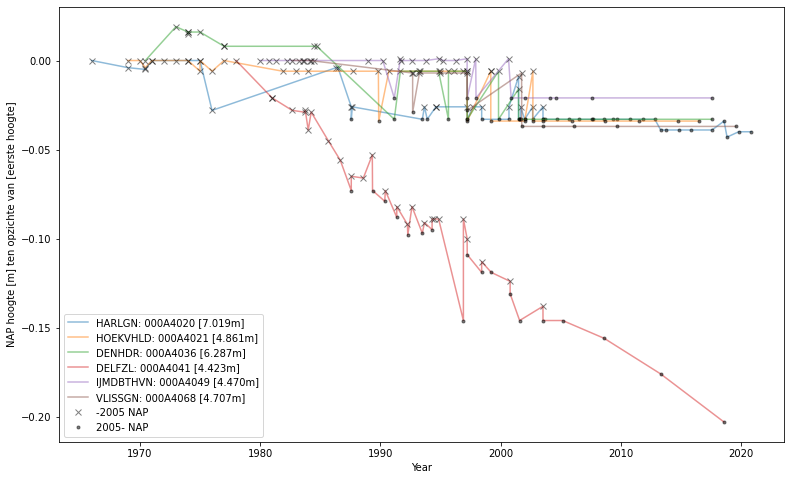

In [8]:
# Make a plot showing the measured heights of the peilmerken.
selected = df[df.Peilmerknummer.isin(station_by_nulpaal)]
fig, ax = plt.subplots(figsize=(13, 8))
for i, (nulpaal, df_i) in enumerate(selected.groupby('Peilmerknummer')):
    hoogte = df_i['Hoogte (m NAP)'] 
    first_nap = hoogte.iloc[0]
    hoogte_anomaly =  hoogte - first_nap
    t = df_i['t']
    revised_idx = df_i['revised']
    ax.plot(t, hoogte_anomaly, '-', label=f"{station_by_nulpaal[nulpaal]}: {nulpaal} [{first_nap:.3f}m]", alpha=0.5)
    # only add label to last line (so that it shows up nicely in the legend)
    label = '-2005 NAP' if i == 5 else ''
    ax.plot(t[~revised_idx], hoogte_anomaly[~revised_idx], 'kx', alpha=0.5, label=label)
    label = '2005- NAP' if i == 5 else ''
    ax.plot(t[revised_idx], hoogte_anomaly[revised_idx], 'k.', alpha=0.5, label=label)
ax.legend(loc='best')
ax.set_ylabel('NAP hoogte [m] ten opzichte van [eerste hoogte]')
ax.set_xlabel('Year')
fig.savefig('nap-history.pdf')
fig.savefig('nap-history.png')